<a href="https://colab.research.google.com/github/coolphotography/Telecom-Churn-Analysis/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import math

%matplotlib inline

# Ignore  the warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

### **Data Set Overview**

In [2]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


**Load the data**

In [3]:
# Read the data
renting_df = pd.read_csv('/content/drive/MyDrive/capstone_project-2/SeoulBikeData.csv', encoding='latin')

**First Five Observations**

In [4]:
renting_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


**Last five observations**

In [5]:
renting_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


**Shape of the Data**

In [6]:
renting_df.shape

(8760, 14)

The provided data consists of over 8760 observations with 14 column variables.

**Feature Data Types**

In [7]:
renting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Data consists of 14 columns variables and 10 of them are Numeric Columns.

In [8]:
# Feature Statistics Summary
# Provides the statistical details for each column.
renting_df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


* The target column Rented Bike Count per hour, ranges between 0 and 3556 over the 1 year span.

* Mean of Rented Bike Count = 704.6, with median and 75% percentile = 504.5 and 1065.25, respectively. This suggests that the 'Rented Bike Count' distribution is more denser at lower values. This is expected as out of 24 hours, we would expect the bike demand/usage to be high for maximum of maybe 6 hours or so.

Hence, we shall expect a strong correlation with hour column.

**Data Cleaning**

In [9]:
# For missing data
renting_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

The dataset provided seems to be a very clean set of data and there are no missing data.

Replacing spaces in the columns with underscore(_).

In [10]:
#function to replace spaces with underscore and ignoring special characters.
def get_underscore_for_space_list(list_of_strings):
  for i in range(len(list_of_strings)):
    if "(" in list_of_strings[i]:
      list_of_strings[i] = list_of_strings[i].split('(')[0]
    list_of_strings[i] = '_'.join(list_of_strings[i].split())
    if "_" in list_of_strings[i][-1]:
      list_of_strings[i] = list_of_strings[i][:-1]
  return list_of_strings


renting_df.columns = get_underscore_for_space_list(list(renting_df.columns))

In [11]:
renting_df.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

### **Exploratory Data Analysis**

**Target Variable:**

In [12]:
# make a copy DF
renting_df1 = renting_df.copy()

Text(0.5, 1.0, 'Rented Bike Count')

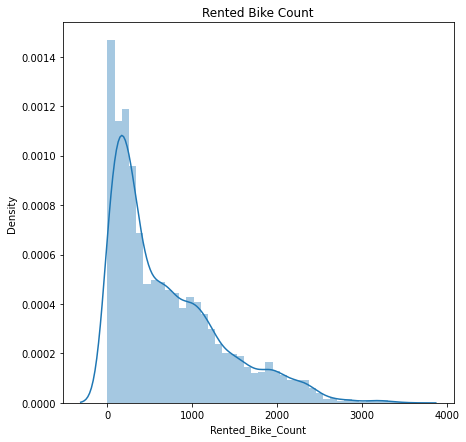

In [13]:
# target value has Rented_Bike_Count values
target_value = renting_df1['Rented_Bike_Count']
plt.figure(figsize=(7,7))
# plot for Rented Bike Count.
sns.distplot(renting_df1['Rented_Bike_Count'])
plt.title('Rented Bike Count')

**Numerical Feature:**

In [14]:
# make numeric_feature variable.
numeric_features = [i for i in renting_df1.describe().columns if i not in ['Rented_Bike_Count']]
numeric_features

['Hour',
 'Temperature',
 'Humidity',
 'Wind_speed',
 'Visibility',
 'Dew_point_temperature',
 'Solar_Radiation',
 'Rainfall',
 'Snowfall']

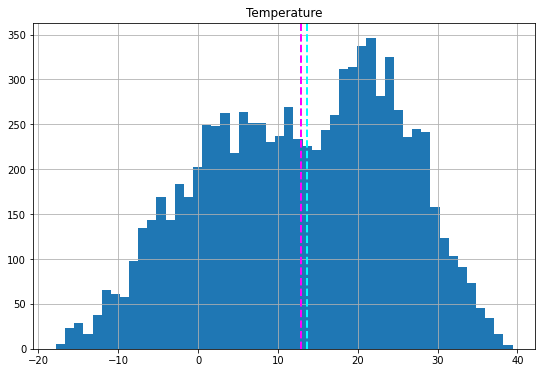

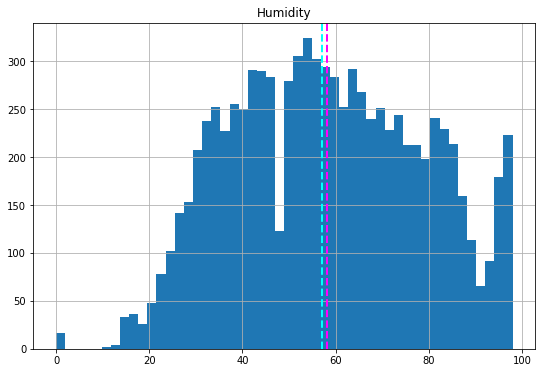

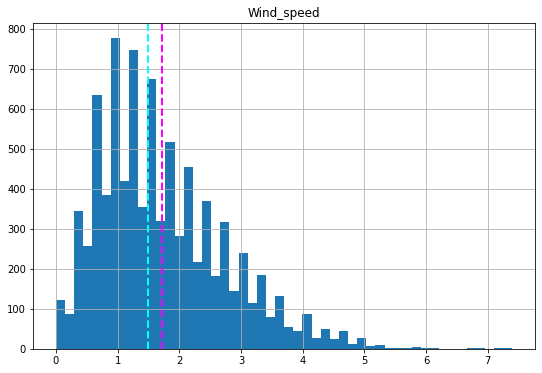

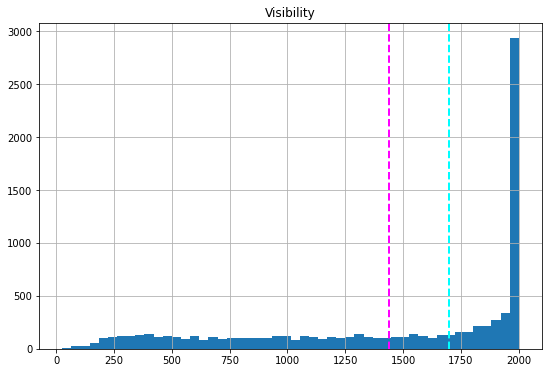

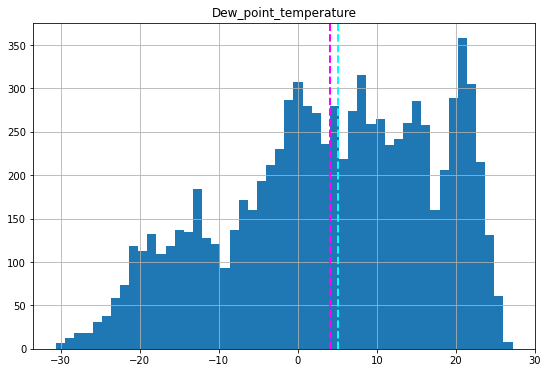

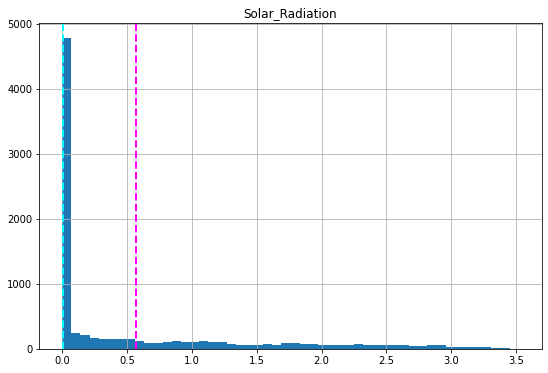

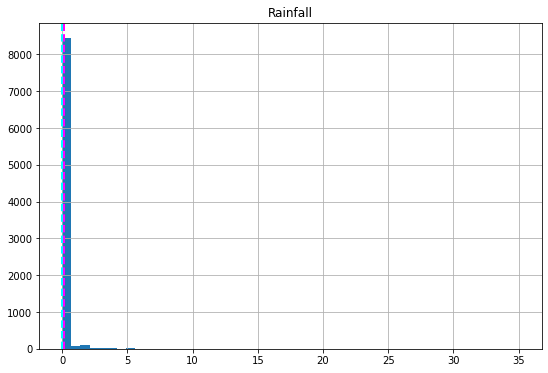

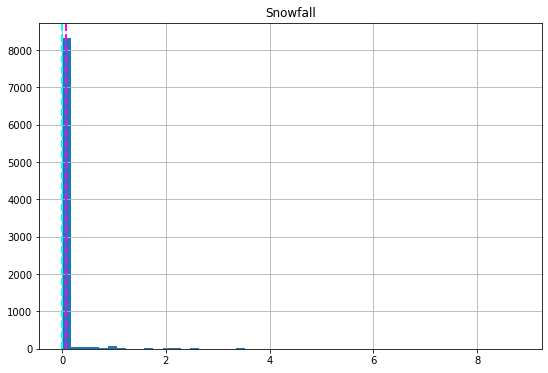

In [15]:
# plot a bar plot for each numerical feature count except for Hour

for col in [i for i in numeric_features if i not in ['Hour']]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = renting_df1[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)

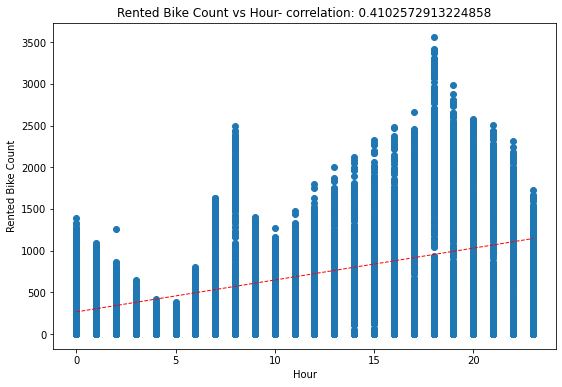

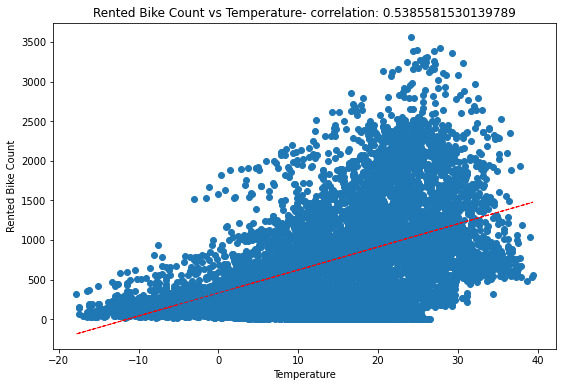

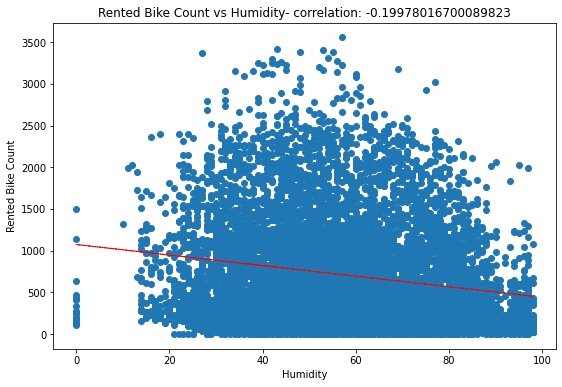

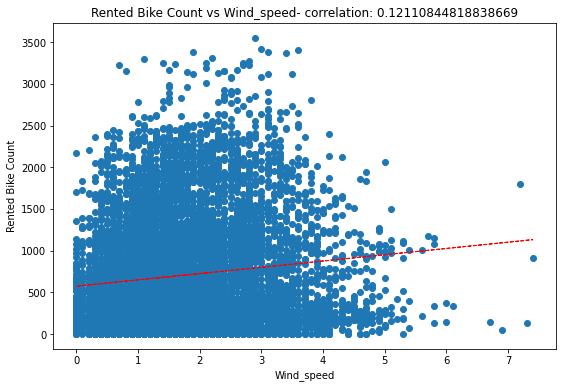

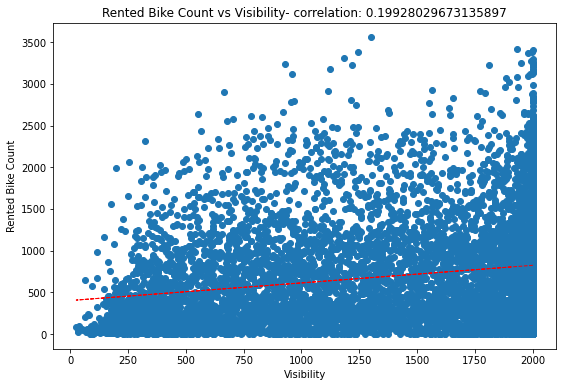

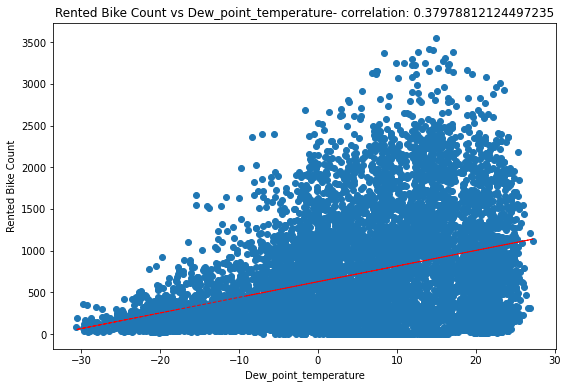

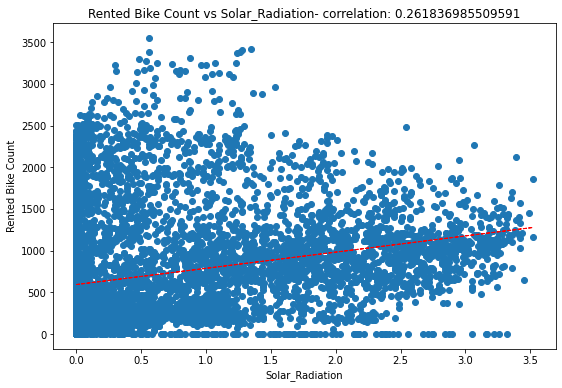

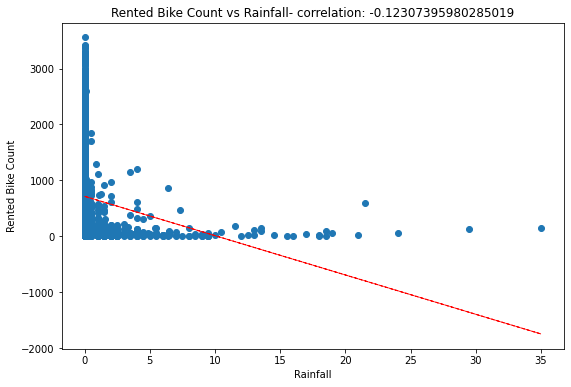

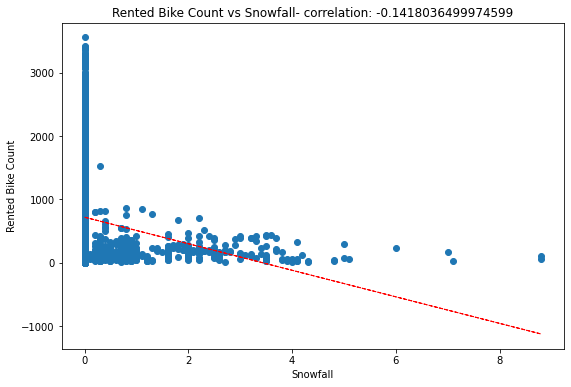

In [16]:
# bivariant plot b/w target value and numeric features
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = renting_df1[col]
    label = renting_df1['Rented_Bike_Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(renting_df1[col], renting_df1['Rented_Bike_Count'], 1)
    y_hat = np.poly1d(z)(renting_df[col])

    plt.plot(renting_df1[col], y_hat, "r--", lw=1)

In [17]:
# Splitting data into holiday and non-holiday
renting_df1_h = renting_df1[renting_df1['Holiday'] == 'Holiday']
renting_df1_nh = renting_df1[renting_df1['Holiday'] == 'No Holiday']

encoders_nums = {"Holiday":{"Holiday":1,"No Holiday":0}}
renting_df1_h = renting_df1_h.replace(encoders_nums)
renting_df1_nh = renting_df1_nh.replace(encoders_nums)

bin_size = 4
renting_df1_h['Temperature1'] = renting_df1_h['Temperature']//bin_size
renting_df1_nh['Temperature1'] = renting_df1_nh['Temperature']//bin_size
mean_count_vs_temp_h = renting_df1_h.groupby('Temperature1')['Rented_Bike_Count'].mean()
mean_count_vs_temp_nh = renting_df1_nh.groupby('Temperature1')['Rented_Bike_Count'].mean()
labels_h = [str(bin_size*i)+' to '+str(bin_size*(i+1)) for i in range(len(mean_count_vs_temp_h))]
labels_nh = [str(bin_size*i)+' to '+str(bin_size*(i+1)) for i in range(len(mean_count_vs_temp_nh))]

([<matplotlib.axis.XTick at 0x7f608193fa10>,
 [Text(0, 0, '0 to 4'),
  Text(0, 0, '4 to 8'),
  Text(0, 0, '8 to 12'),
  Text(0, 0, '12 to 16'),
  Text(0, 0, '16 to 20'),
  Text(0, 0, '20 to 24'),
  Text(0, 0, '24 to 28'),
  Text(0, 0, '28 to 32'),
  Text(0, 0, '32 to 36'),
  Text(0, 0, '36 to 40'),
  Text(0, 0, '40 to 44'),
  Text(0, 0, '44 to 48'),
  Text(0, 0, '48 to 52'),
  Text(0, 0, '52 to 56'),
  Text(0, 0, '56 to 60')])

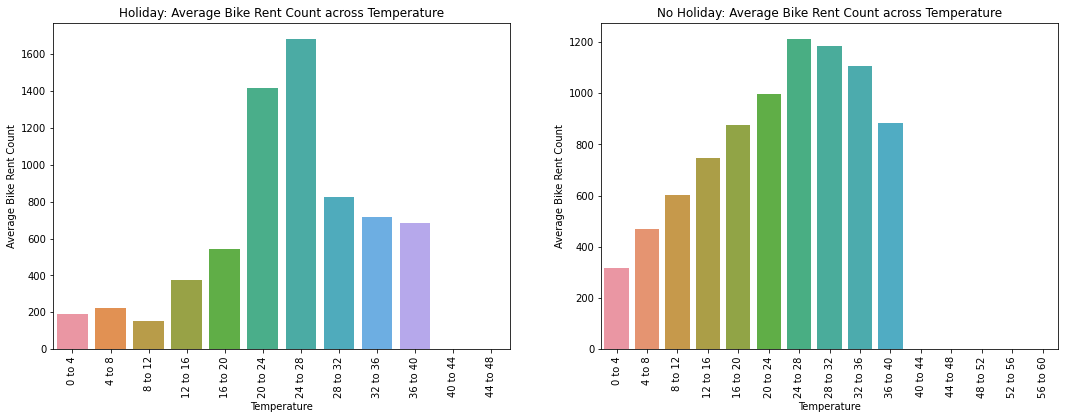

In [18]:
# plot for deeper understanding the effect of temperature on average bike count on Holiday and No Holiday
fig = plt.figure(figsize=(18, 6))
axes = fig.add_subplot(1, 2, 1)
idx_h, idx_nh = range(len(mean_count_vs_temp_h)), range(len(mean_count_vs_temp_nh))
sns.barplot(x = renting_df1_h.groupby('Temperature1')['Rented_Bike_Count'].mean().reset_index()['Temperature1'], y = renting_df1_h.groupby('Temperature1')['Rented_Bike_Count'].mean(), ax = axes)
plt.xlabel('Temperature')
plt.ylabel('Average Bike Rent Count')
plt.title('Holiday: Average Bike Rent Count across Temperature')
plt.xticks(idx_h, labels_h, rotation=90)

axes = fig.add_subplot(1, 2, 2)
sns.barplot(x = renting_df1_nh.groupby('Temperature1')['Rented_Bike_Count'].mean().reset_index()['Temperature1'], y = renting_df1_nh.groupby('Temperature1')['Rented_Bike_Count'].mean(), ax = axes)
plt.xlabel('Temperature')
plt.ylabel('Average Bike Rent Count')
plt.title('No Holiday: Average Bike Rent Count across Temperature')
plt.xticks(idx_nh, labels_nh, rotation=90)

INFERENCE:

From the above bar plot, we notice that there is a increase in the average bikes rented with temperature and a small decrease at the highest temperature bin.

**Overall Numeric feature observation:**

* Higher reservations can be seen at around 8am and 6pm (office hours) and very few reservations at very early in the morning.
* We can notice that in general, more people tend to prefer biking at moderate to high temperatures; however, if the temperature is too hot there is a small decline in count.
* Temperature, Windspeed, Visibility, Dew point temperature, Solar radiation have a positive correlation with bike rents.
* Humidity, Rainfall, Snowfall have a negative correlation with bike rents.

**Categorical Feature:**

In [19]:
# categorical_features contains all the categorical columns.
categorical_features = renting_df1.describe(include = 'object').columns
categorical_features

Index(['Date', 'Seasons', 'Holiday', 'Functioning_Day'], dtype='object')

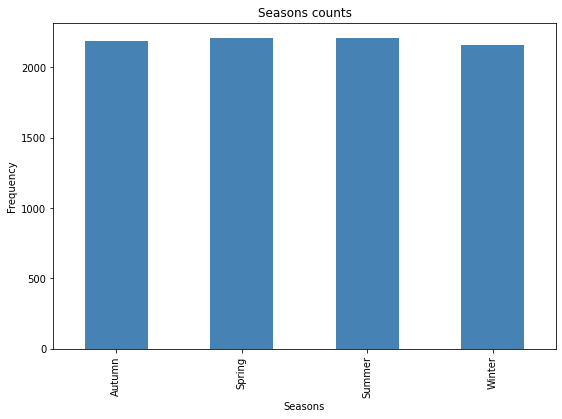

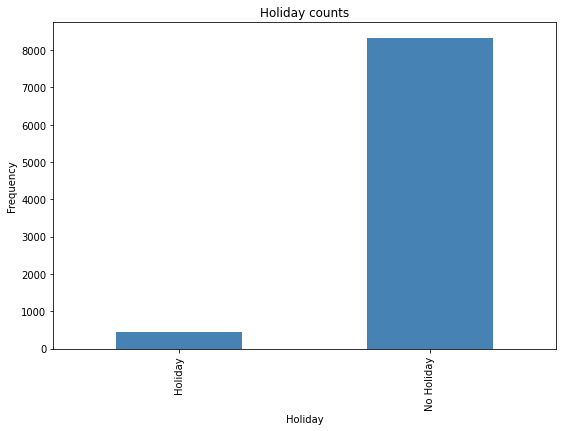

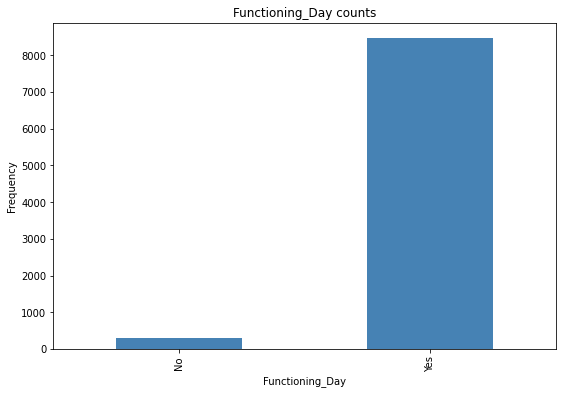

In [21]:
# categorical_features plots
for col in [i for i in categorical_features if i not in ['Date']]:
    counts = renting_df1[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")

**Rented Bike Count vs. Seasons, Holiday, Functioning Day**

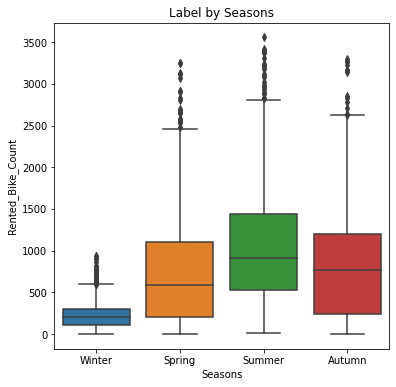

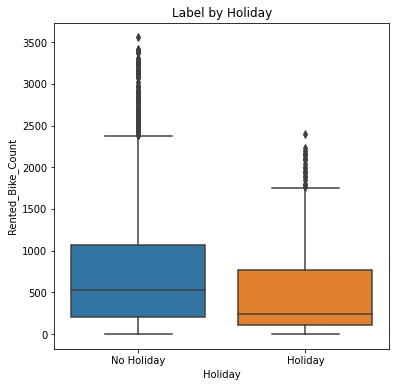

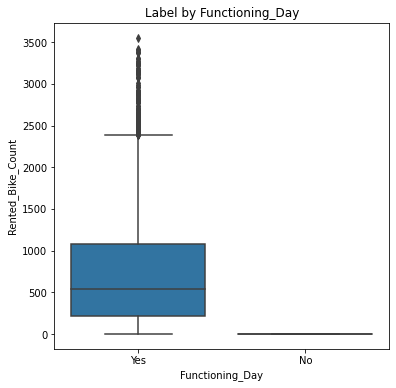

In [23]:
# Rented Bike Count across the various categorical data (Seasons, Holiday, Functioning Day)
for col in [i for i in categorical_features if i not in ['Date']]:
    fig = plt.figure(figsize=(6, 6))
    ax = fig.gca()
    sns.boxplot(x = col, y = "Rented_Bike_Count", data=renting_df1)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Rented_Bike_Count")

Inference:

* Rented Bike Count are lesser in Winter season compared to other seasons.
* Lots of outlier points in every season and for 'No Holiday'.
* More bikes are rented on working days.
* On the non functioning day there are no bike rented.

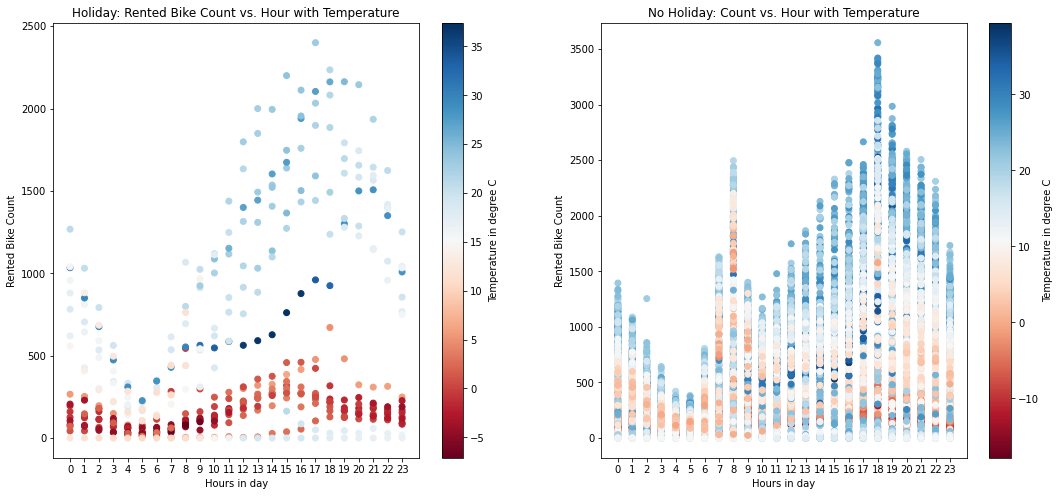

In [36]:
# Rented Bike Count vs. hour with temperature
fig = plt.figure(figsize=(18, 8))
# Holiday
axes = fig.add_subplot(1, 2, 1)
f = axes.scatter(renting_df1_h.Hour, renting_df1_h['Rented_Bike_Count'], c=renting_df1_h.Temperature, cmap = 'RdBu')
axes.set(xticks = range(24), xlabel='Hours in day', ylabel='Rented Bike Count', title='Holiday: Rented Bike Count vs. Hour with Temperature')
cbar = plt.colorbar(f)
cbar.set_label('Temperature in degree C')

# No Holiday
axes = fig.add_subplot(1, 2, 2)
f = axes.scatter(renting_df1_nh.Hour, renting_df1_nh['Rented_Bike_Count'], c=renting_df1_nh.Temperature, cmap = 'RdBu')
axes.set(xticks = range(24), xlabel='Hours in day', ylabel='Rented Bike Count', title='No Holiday: Count vs. Hour with Temperature')
cbar = plt.colorbar(f)
cbar.set_label('Temperature in degree C')

**Date feature**

In [26]:
# Splitting datetime object into month, date, hour and day category columns
renting_df1["Date"] = pd.to_datetime(renting_df.Date, format='%d/%m/%Y')
renting_df1['month'] = renting_df1["Date"].dt.month
renting_df1['day_of_week'] = renting_df1["Date"].dt.dayofweek
renting_df1['day_of_month'] = renting_df1["Date"].dt.day

In [27]:
date_numeric_feature = ['month', 'day_of_week', 'day_of_month']

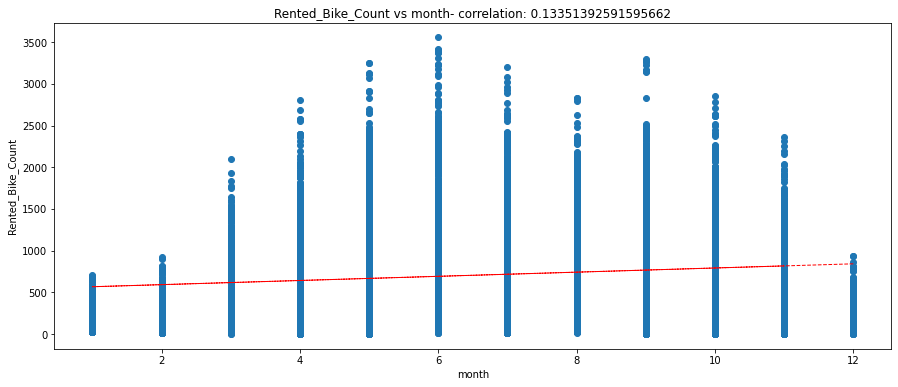

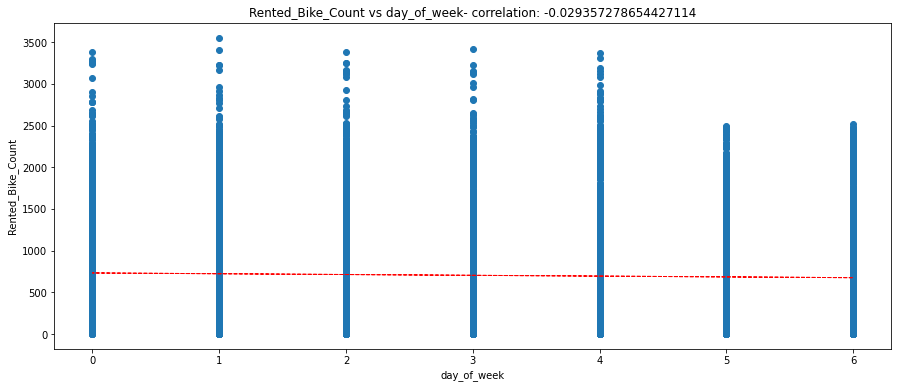

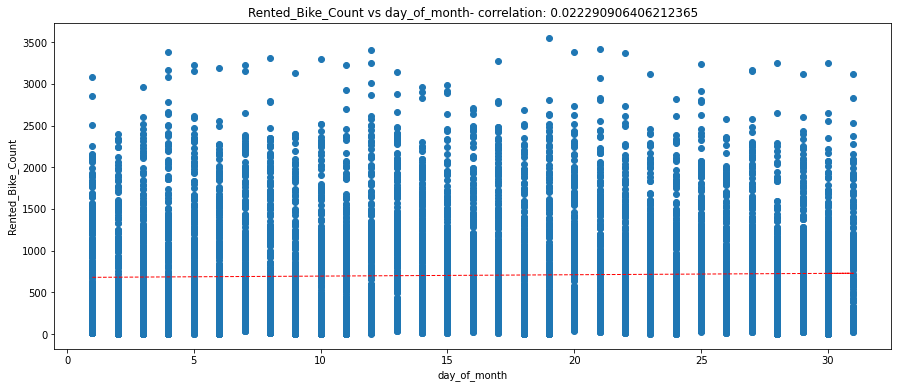

In [28]:
# plot a bar plot for each date numerical feature vs rented bike count

for col in date_numeric_feature:
    fig = plt.figure(figsize=(15, 6))
    ax = fig.gca()
    feature = renting_df1[col]
    label = renting_df1['Rented_Bike_Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented_Bike_Count')
    ax.set_title('Rented_Bike_Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(renting_df1[col], renting_df1['Rented_Bike_Count'], 1)
    y_hat = np.poly1d(z)(renting_df1[col])

    plt.plot(renting_df1[col], y_hat, "r--", lw=1)

[Text(0, 0.5, 'Rented_Bike_Count'),
 Text(0.5, 0, 'Hour in the day'),
 Text(0.5, 1.0, 'Average Bike Rentals by the day across Weekdays')]

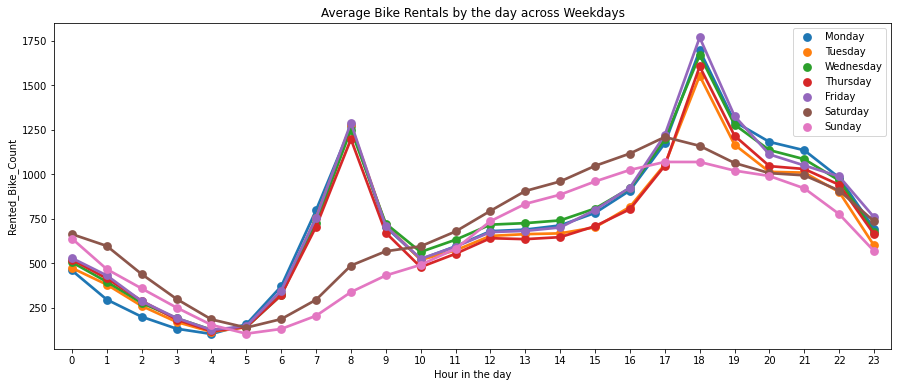

In [29]:
# Average Bike Rentals by the day across week days

f, axes = plt.subplots(1, 1, figsize=(15, 6))
group_day_hour = pd.DataFrame(renting_df1.groupby(['day_of_week', 'Hour'])['Rented_Bike_Count'].mean()).reset_index()
sns.pointplot(data=group_day_hour, x='Hour', y='Rented_Bike_Count', hue='day_of_week', ax=axes)
handles, _ = axes.get_legend_handles_labels()
axes.legend(handles, ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
axes.set(xlabel='Hour in the day', ylabel='Rented_Bike_Count', title='Average Bike Rentals by the day across Weekdays')

[Text(0.5, 1.0, 'Hourly Rented Bike Count based on Holiday or no Holiday')]

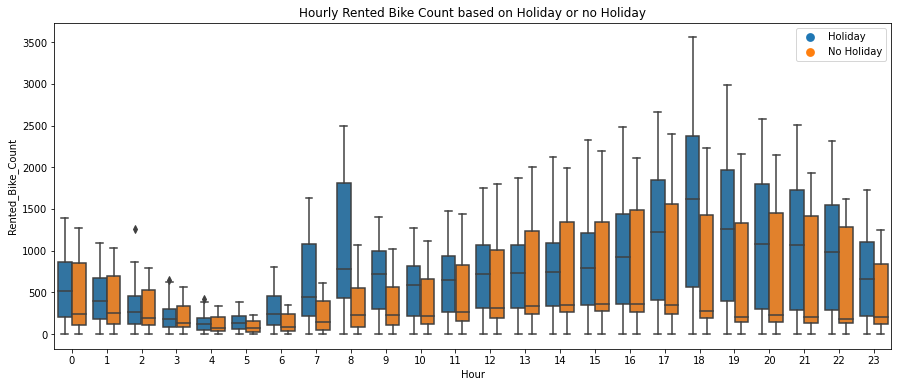

In [30]:
# seaborn boxplots across hours

f, ax = plt.subplots(1, 1, figsize=(15, 6))
sns.boxplot(data=renting_df1, y='Rented_Bike_Count', x='Hour', hue='Holiday', ax=ax)
handles, _ = axes.get_legend_handles_labels()
ax.legend(handles, ['Holiday', 'No Holiday'])
ax.set(title='Hourly Rented Bike Count based on Holiday or no Holiday')

[Text(0.5, 1.0, 'Hourly Rented Bike Count based on Holiday or no Holiday')]

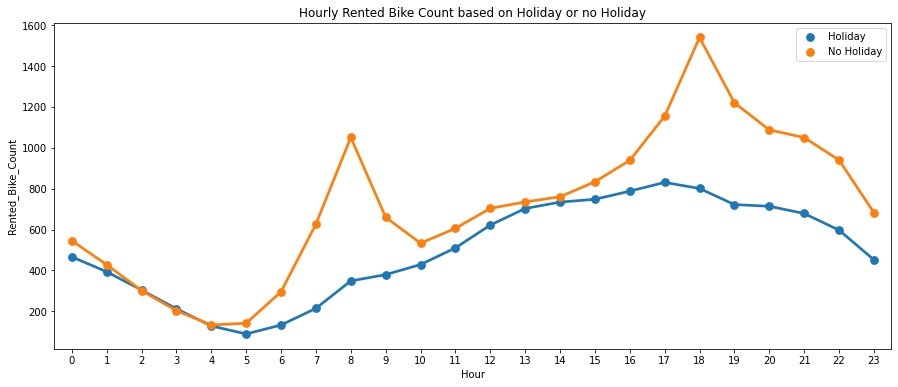

In [31]:
# seaborn boxplots across hours

f, ax = plt.subplots(1, 1, figsize=(15, 6))
rented_bike_count_mean_hour = pd.DataFrame(renting_df1.groupby(['Holiday', 'Hour'])['Rented_Bike_Count'].mean()).reset_index()
sns.pointplot(data=rented_bike_count_mean_hour, y='Rented_Bike_Count', x='Hour', hue='Holiday', ax=ax)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Holiday', 'No Holiday'])
ax.set(title='Hourly Rented Bike Count based on Holiday or no Holiday')

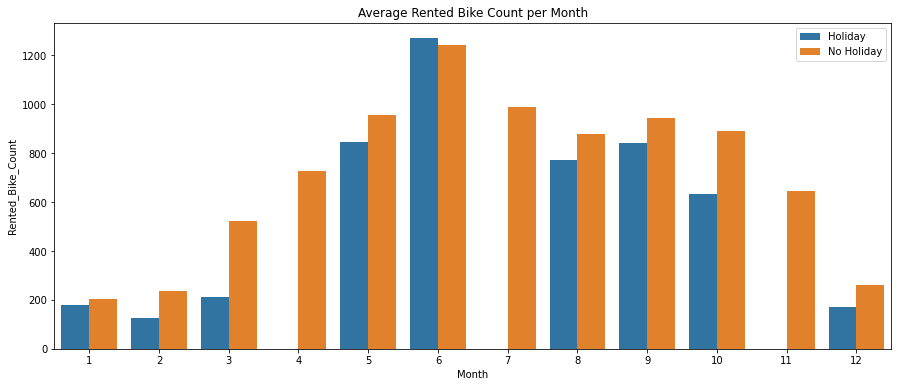

In [32]:
# Average Monthly Count Distribution plot

f, ax = plt.subplots(1, 1, figsize=(15, 6))
group_month = pd.DataFrame(renting_df1.groupby(['month', 'Holiday'])['Rented_Bike_Count'].mean()).reset_index()
sns.barplot(data=group_month, x='month', y='Rented_Bike_Count', hue='Holiday', ax=ax)
handles, _ = ax.get_legend_handles_labels()
ax.set(xlabel='Month', ylabel='Rented_Bike_Count', title='Average Rented Bike Count per Month')
ax.legend(handles, ['Holiday', 'No Holiday'])

* Very few number of outliers can be seen in the seaborn box plot across hours.
* Higher reservations can be seen at around 8am and 6pm (office hours) and very low reservations at very early in the morning.
No Holiday: There is a peak in the rentals at around 8am and another at around 6pm.
Holiday: There is slight increase in rentals across the day with a peak at 5pm. These correspond to probably tourists.
Also, we can see that we have highest bike rents in June. No holidays in 4th, 7th, and 11th month.

Text(0.5, 1.0, ' Heatmap for correlation between all the numerical features ')

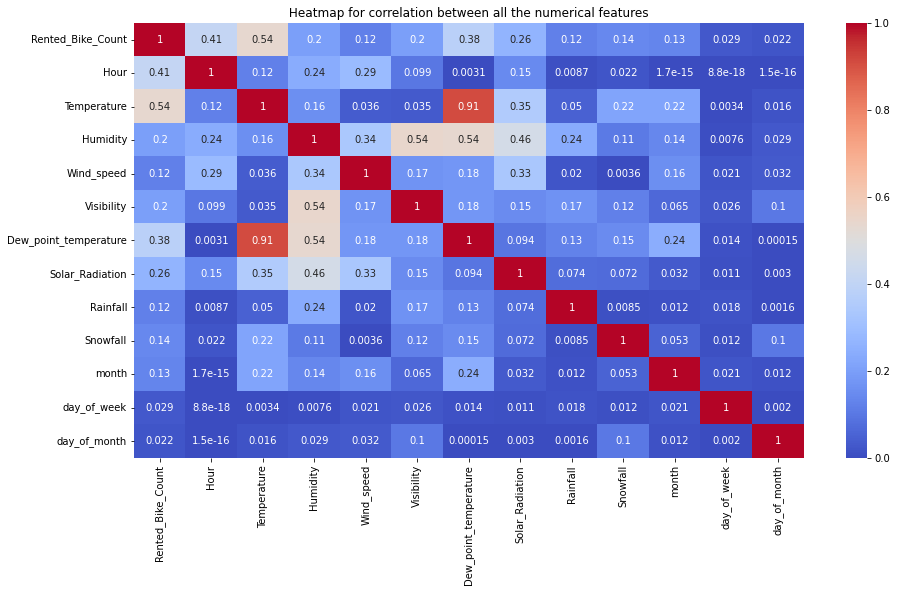

In [33]:
#Correlation
plt.figure(figsize=(15,8))
correlation = renting_df1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
plt.title(' Heatmap for correlation between all the numerical features ')

In [34]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [35]:
numeric_features = [i for i in renting_df1.describe().columns if i not in ['Rented_Bike_Count', 'Dew_point_temperature']]
calc_vif(renting_df1[numeric_features])

,variables,VIF
0,Hour,4.019774
1,Temperature,3.308515
2,Humidity,7.407425
3,Wind_speed,4.669663
4,Visibility,5.600624
5,Solar_Radiation,2.301785
6,Rainfall,1.082041
7,Snowfall,1.141194
8,month,5.041744
9,day_of_week,3.124912


Inferences from the above heatmap:

* Temperature and Dew point temperature are highly correlated.
* We see a positive correlation between Rented Bike Count and Temperature (as seen in the scatter plot). This is probably only true for the range of temperatures provided.
* We see a negative correlation between Rented Bike Count and Humidity. The more the humidity, the less people prefer to ride.
* Not a great amount of correlation between humidity and temperature.
* Rented Bike Count has a weak dependence on day_of_month, day_of_week, month.

**Summary**

* Season: Month column has a direct mapping with season (Winter:December, January, February) Summer: June to August, Autumn: September to November and Spring: March to May). Hence we will drop Seasons column.
* Functioning Day: The bikes rented on Non-functioning days are zero, so we remove the rows of non-functioing day and we will drop Functioning Day column.
* Temperature: Temperature and Dew point temperature are highly correlated. Hence retain only the Temperature column.
* Date: Intuitively, there should be no dependency on date. Hence drop this column
* Hour: Split hour column to hour_0, hour_1, ..., hour_23. Drop hour_23 since it is a function of the rest of the hour columns.